# Create LESCO Time-Series dataset with Image Augmentation

Download the dataset at: [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.5756387.svg)](https://doi.org/10.5281/zenodo.5756387)

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output

import numpy as np
import cv2 as cv
import mediapipe as mp
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

import pandas as pd
import os
import csv

# code with all the needed functionality
import lesco as lsc

mp_hands = mp.solutions.hands

In [2]:
# read all paths and extract classes from folder names.
root = r"C:\Users\JuanZamora\OneDrive - Bylte\Desktop\Contie2022\single"

classes_ = []
files_ = []

for path, subdirs, files in os.walk(root):
    for name in files:
        class_name = os.path.basename(path)
        file_path = path + '\\' + name
        classes_.append(class_name)
        files_.append(file_path)
        
print(len(files_), "video files detected")

1 video files detected


# Process All Files with Augmentation
this might take a while, go for coffee...

In [3]:
videos = []
videos_labels = []

total = len(files_)
count = 1

tsne = TruncatedSVD(n_components=1) 

for file_, class_ in zip(files_, classes_):
    
    try:
        print("processing...", class_)
        # process videos with augmentation
        v1 = lsc.process_video(file_, tsne, False, False, 0) # normal
        v2 = lsc.process_video(file_, tsne, True, False, 0) # flipped
        v3 = lsc.process_video(file_, tsne, False, True, 5) # normal with rotation +5
        v4 = lsc.process_video(file_, tsne, False, True, -5) # normal with rotation -5
        v5 = lsc.process_video(file_, tsne, True, True, 5) # flipped with rotaion +5
        v6 = lsc.process_video(file_, tsne, True, True, -5) # flipped with rotation -5


        # add to tensor
        videos.append(v1)
        videos.append(v2)
        videos.append(v3)
        videos.append(v4)
        videos.append(v5)
        videos.append(v6)

        # create labeled list
        videos_labels.append(class_)
        videos_labels.append(class_)
        videos_labels.append(class_)
        videos_labels.append(class_)
        videos_labels.append(class_)
        videos_labels.append(class_)

        print("completed", round((count/total) * 100, 2), "%")
        print("examples created", len(videos), "\n")

    except:
        print("Error on", file_)

    count = count + 1


    if (count % 10 == 0):
        clear_output(wait=True)
    
    
print("All Videos Completed. Total Samples Created", len(videos))    

processing... arboles
frames processed 78
frames processed 78
frames processed 78
frames processed 78
frames processed 78
frames processed 78
completed 100.0 %
examples created 6 

All Videos Completed. Total Samples Created 6


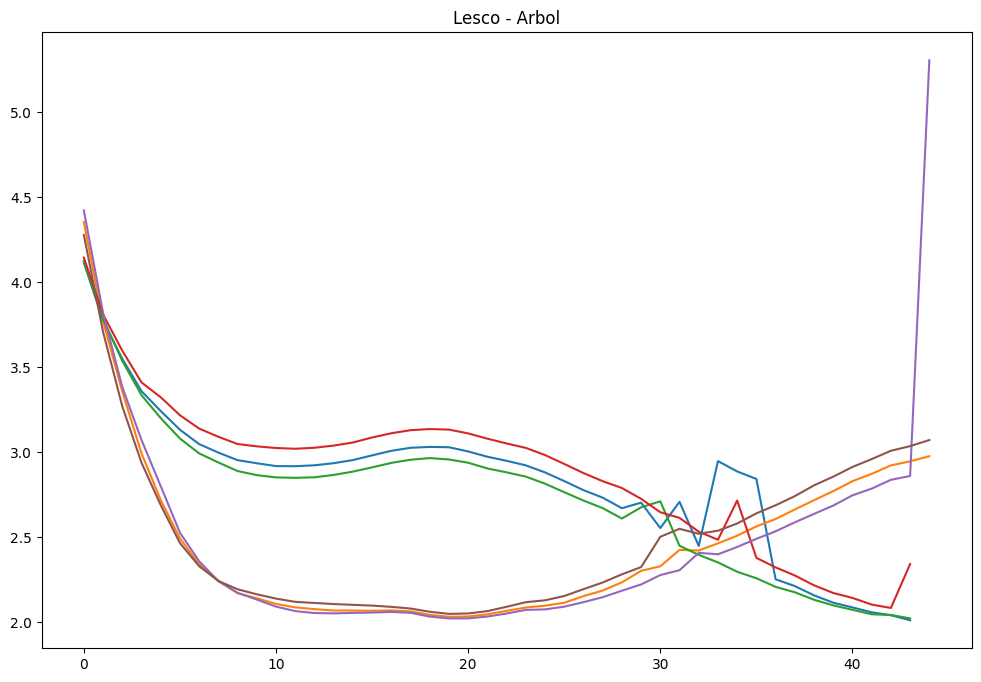

In [4]:
plt.figure(figsize=(12, 8))
plt.title("Lesco - Arbol")    
for video in videos:
    plt.plot(video)